In [16]:
import numpy as np
from numpy.fft import fft
from matplotlib import pyplot as plt

In [60]:
f, f_d = 40, 30
N = 0

k = np.arange(40)
t = np.linspace(0, len(k), 40)
x_t = np.sin(2*np.pi*f*t)
X_t = fft(x_t)

x = np.sin(2*np.pi*f/f_d*k)
x = np.hstack([x, np.zeros(N)])
k = np.hstack([k, np.arange(len(k), N + len(k))])
X = fft(x)

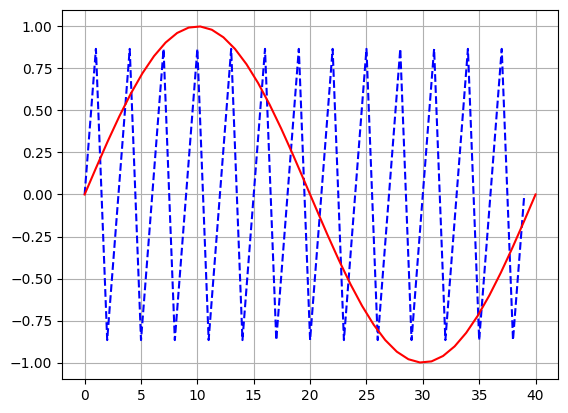

In [61]:

plt.plot(k, x, '--b')
plt.plot(t, x_t, 'r')
plt.grid()

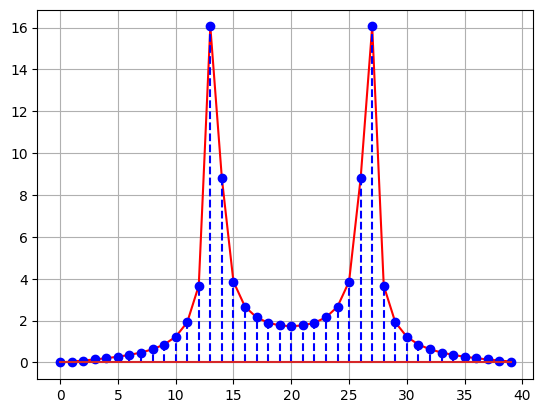

In [57]:
plt.plot(k, np.abs(X), 'r')
plt.stem(k, np.abs(X), 'b--')
plt.grid()